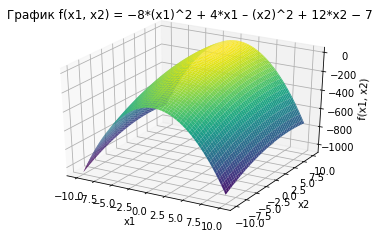

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def objective_function(x1, x2):
    return -8 * x1**2 + 4 * x1 - x2**2 + 12 * x2 - 7

# Создание сетки значений x1, x2
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)
X1, X2 = np.meshgrid(x1, x2)

# Вычисление значений функции на сетке
Z = objective_function(X1, X2)

# Построение графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title('График f(x1, x2) = −8*(x1)^2 + 4*x1 – (x2)^2 + 12*x2 − 7')
plt.show()


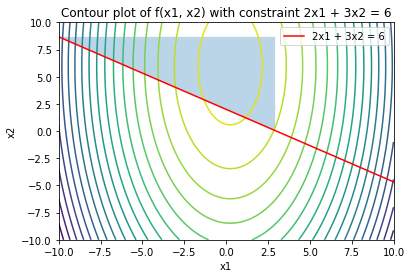

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(x1, x2):
    return -8 * x1**2 + 4 * x1 - x2**2 + 12 * x2 - 7

def constraint(x1, x2):
    return 2 * x1 + 3 * x2 - 6

# Создание сетки значений x1, x2
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)
X1, X2 = np.meshgrid(x1, x2)

# Вычисление значений функции на сетке
Z = objective_function(X1, X2)

# Создание контурного графика
fig, ax = plt.subplots()
contour = ax.contour(X1, X2, Z, levels=20)

# Отрисовка ограничения
x2_constraint = (6 - 2 * x1) / 3
ax.plot(x1, x2_constraint, 'r', label='2x1 + 3x2 = 6')
ax.fill_between(x1, x2_constraint, np.max(x2_constraint), where=(x2_constraint >= 0), alpha=0.3)

# Настройка осей и легенды
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Contour plot of f(x1, x2) with constraint 2x1 + 3x2 = 6')
ax.legend()

# Отображение графика
plt.show()


In [50]:
import numpy as np

def objective_function(x):
    return -8 * x[0]**2 + 4 * x[0] - x[1]**2 + 12 * x[1] - 7

def constraint(x):
    return 2 * x[0] + 3 * x[1] - 6

def projection(x):
    if constraint(x) == 0:
        return x
    else:
        return x - constraint(x) / (2 * x[0] + 3 * x[1]) * np.array([2, 3])

def gradient(x):
    return np.array([-16 * x[0] + 4, -2 * x[1] + 12])

max_iterations = 1000
step_size = 0.1
epsilon = 1e-6

initial_point = np.array([0, 2])

x = initial_point
iterations = 0

while iterations < max_iterations:
    grad = gradient(x)
    x_new = projection(x + step_size * grad)

    if np.linalg.norm(x_new - x) < epsilon:
        break

    x = x_new
    iterations += 1

print("Максимум достигнут в точке:", x)
print("Значение функции в максимуме:", objective_function(x))
print("Число итераций:", iterations)

Максимум достигнут в точке: [-0.11369293  1.63568623]
Значение функции в максимуме: 9.394584947616682
Число итераций: 9
